In [1]:
from __future__ import division
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns

import comptools as comp

%matplotlib inline

/home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
config = 'IC86.2012'
num_groups = 2
comp_list = comp.get_comp_list(num_groups=num_groups)

In [3]:
energybins = comp.analysis.get_energybins()

In [4]:
df_sim = comp.load_sim(config=config, test_size=0, log_energy_min=6.0, log_energy_max=8.3)

/home/jbourbeau/cr-composition/comptools/dataframe_functions.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['MC_log_energy'] = np.nan_to_num(np.log10(df['MC_energy']))
/home/jbourbeau/cr-composition/comptools/dataframe_functions.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['lap_log_energy'] = np.nan_to_num(np.log10(df['lap_energy']))
/home/jbourbeau/cr-composition/comptools/dataframe_functions.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [5]:
reco_log_energy = df_sim.reco_log_energy.values
MC_log_energy = df_sim.MC_log_energy.values

In [6]:
reco_log_energy.min(), reco_log_energy.max()

(5.8706997933867777, 7.9804107283376275)

In [7]:
MC_log_energy.min(), MC_log_energy.max()

(5.6953482374002959, 7.999821416140386)

In [8]:
h, xedges, yedges = np.histogram2d(MC_log_energy, reco_log_energy, bins=energybins.log_energy_bins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
h = h / h.sum(axis=0)
h = h.T

[[  1.41900000e+03   1.03500000e+03   1.68000000e+02   6.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  9.03000000e+02   2.15000000e+03   1.15200000e+03   9.70000000e+01
    2.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.13000000e+02   1.21300000e+03   2.49600000e+03   1.13200000e+03
    1.03000000e+02   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00

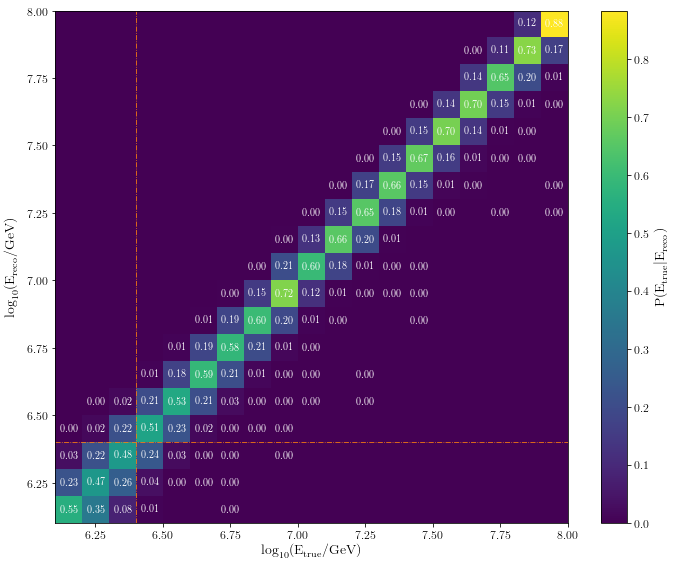

In [17]:
bins = energybins.log_energy_bins
bin_midpoints = energybins.log_energy_midpoints

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(h, origin='lower', extent=extent)
# Current analysis range
# ax.axvline(6.4, marker='None', ls='-.', color='w')
# ax.axhline(6.4, marker='None', ls='-.', color='w')
# ax.axvline(7.9, marker='None', ls='-.', color='w')
# ax.axhline(7.9, marker='None', ls='-.', color='w')

# for i in bins:
#     ax.axvline(i, marker='None', ls=':', color='w')
#     ax.axhline(i, marker='None', ls=':', color='w')

ax.axvline(6.4, marker='None', ls='-.', color='C1')
ax.axhline(6.4, marker='None', ls='-.', color='C1')
# ax.axvline(7.8, marker='None', ls='-.', color='C1')
# ax.axhline(7.8, marker='None', ls='-.', color='C1')

# Add histogram value annotations
for i in range(len(xedges)-1):
    for j in range(len(yedges)-1):
        if h[j, i] != 0 and ~np.isnan(h)[j, i]:
            ax.text(bin_midpoints[i], bin_midpoints[j], '{:0.2f}'.format(h[j, i]), 
                    color='w', ha="center", va="center")
        
ax.set_xlabel('$\mathrm{\log_{10}(E_{true}/GeV)}$')
ax.set_ylabel('$\mathrm{\log_{10}(E_{reco}/GeV)}$')
ax.set_xlim(6.1, 8)
ax.set_ylim(6.1, 8)
# ax.text(6.375, 5.935, '6.4')
# ax.text(5.925, 6.375, '6.4')
plt.colorbar(im, label='$\mathrm{P(E_{true}|E_{reco})}$')
outfile = os.path.join(comp.paths.figures_dir, 'unfolding', 'analysis-bins.png')
plt.savefig(outfile)
plt.show()